In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
import warnings 
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv", sep =',',  header =0)
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [5]:
df.head(-1)


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5104,14180,Female,13.0,0,0,No,children,Rural,103.08,18.6,Unknown,0
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


In [6]:
df.describe()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [7]:
df.describe(include=['object'])

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


In [8]:
df.groupby('age').size()

age
0.08       2
0.16       3
0.24       5
0.32       5
0.40       2
        ... 
78.00    102
79.00     85
80.00     70
81.00     60
82.00     56
Length: 104, dtype: int64

In [9]:
len(df['age']. unique())

104

In [10]:
#last n rows from df
df.tail(-4)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [11]:
print("Le nombre de lignes",df.shape[0])
print("Le nombre de colonnes",df.shape[1])


Le nombre de lignes 5110
Le nombre de colonnes 12


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [13]:
df.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [14]:
for var in df.columns:
    print('Variable:',var, '   ',df[var].isnull().count())

Variable: id     5110
Variable: gender     5110
Variable: age     5110
Variable: hypertension     5110
Variable: heart_disease     5110
Variable: ever_married     5110
Variable: work_type     5110
Variable: Residence_type     5110
Variable: avg_glucose_level     5110
Variable: bmi     5110
Variable: smoking_status     5110
Variable: stroke     5110


In [15]:
df.drop(['id'], axis=1, inplace=True)


In [16]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [17]:
df['age'] = df['age'].astype('int64')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [18]:
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [19]:
df.isnull().any()

gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

In [20]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [21]:
df.bmi.isna().value_counts()

False    4909
True      201
Name: bmi, dtype: int64

In [22]:
dd=df.copy()

In [23]:
dd.dropna(subset=['bmi'],axis=0,inplace=False)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,Male,81,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
5104,Female,13,0,0,No,children,Rural,103.08,18.6,Unknown,0
5106,Female,81,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [24]:
df.bmi.fillna(df['bmi'].mean(), inplace=True)

In [25]:
df.stroke.value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [26]:
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [27]:
df.ever_married.value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

In [28]:
pd.crosstab(df['work_type'],df['stroke'])

stroke,0,1
work_type,,
Govt_job,624,33
Never_worked,22,0
Private,2776,149
Self-employed,754,65
children,685,2


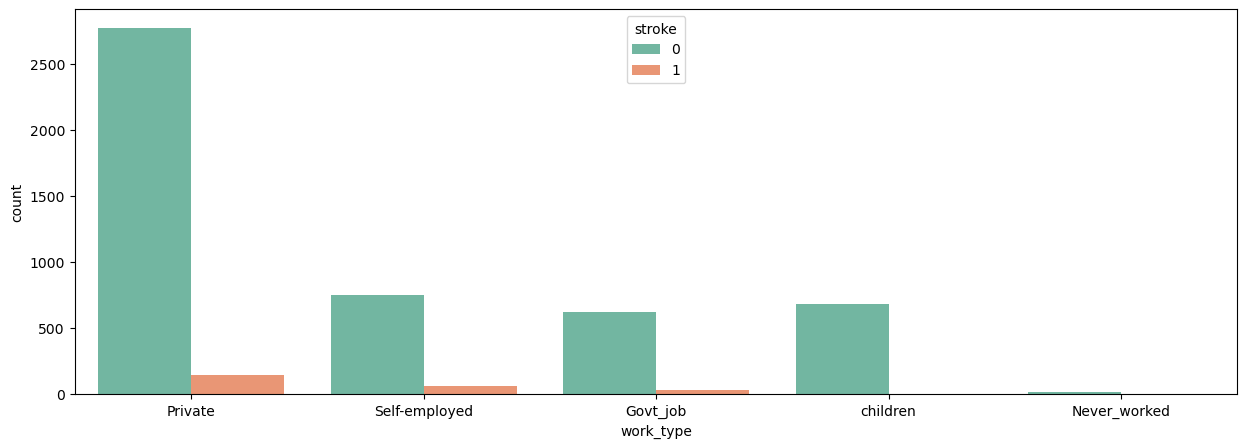

In [29]:
plt.figure(figsize=(15,5))

sns.countplot( x='work_type', hue=df['stroke'], palette='Set2', data=df);

In [30]:
df_num = df[['age', 'avg_glucose_level', 'bmi']]

In [31]:
df_cat = df[['gender', 'hypertension', 'heart_disease', 'ever_married',
                             'work_type', 'Residence_type', 'smoking_status']]

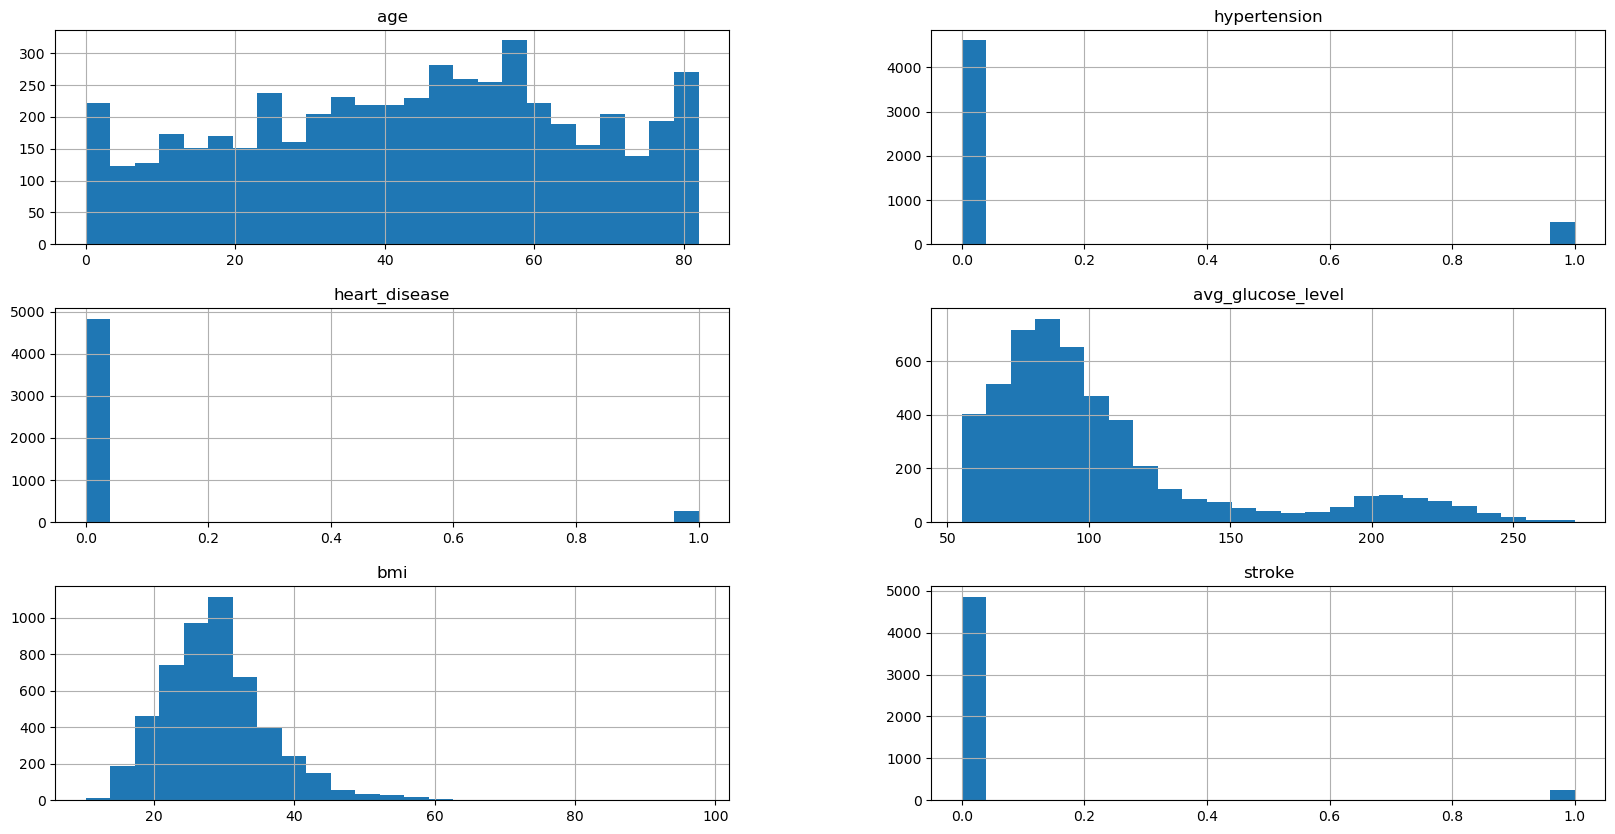

In [32]:
df.hist(bins=25, figsize=(20,10));

<AxesSubplot:xlabel='stroke', ylabel='count'>

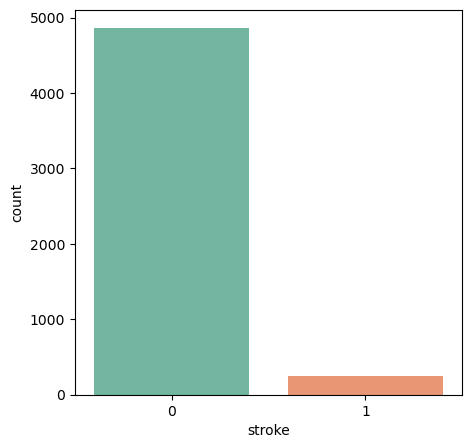

In [33]:
plt.figure(figsize=(5,5))
sns.countplot( x='stroke', palette='Set2', data=df)

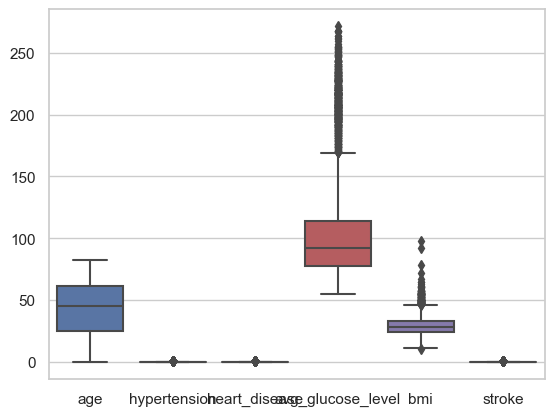

In [34]:
sns.set(style='whitegrid')
ax=sns.boxplot(data=df,orient='v')

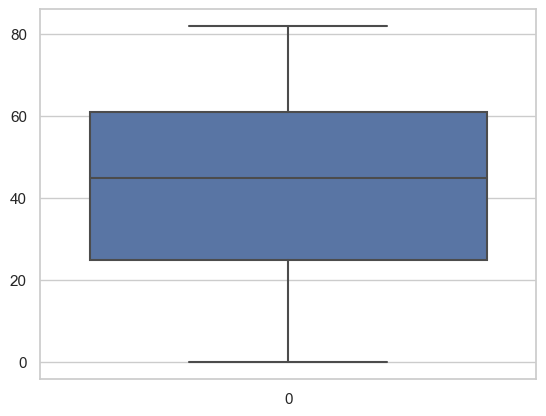

In [35]:
sns.set(style='whitegrid')
ax=sns.boxplot(data=df['age'],orient='v')

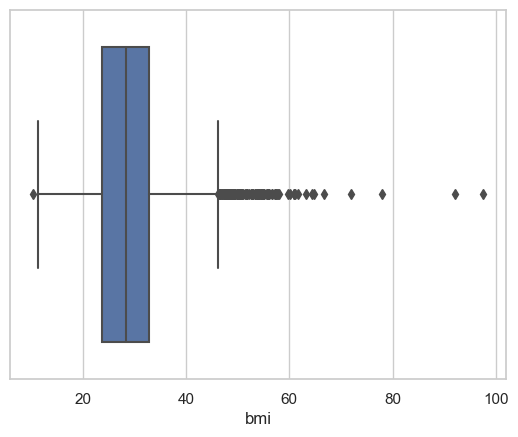

In [36]:
sns.set(style='whitegrid')
ax=sns.boxplot(df['bmi'],orient='h')

In [37]:
Q1=df['bmi'].quantile(0.25)
Q3=df['bmi'].quantile(0.75)
IQR=Q3-Q1
Inf = df['bmi'].quantile(0.25)-1.5*IQR
Sup = df['bmi'].quantile(0.75)+1.5*IQR

In [38]:
print(Sup)

46.29999999999999


In [39]:
df[df['bmi']>=Sup].count()

gender               125
age                  125
hypertension         125
heart_disease        125
ever_married         125
work_type            125
Residence_type       125
avg_glucose_level    125
bmi                  125
smoking_status       125
stroke               125
dtype: int64

In [40]:
def drop_outliers(data,field_name):
    q1=data[field_name].quantile(0.25)
    q3=data[field_name].quantile(0.75)
    iqr=q3-q1
    inf = data[field_name].quantile(0.25)-1.5*iqr
    sup = data[field_name].quantile(0.75)+1.5*iqr
   
    data.drop(data[data[field_name]>sup].index,inplace=True)
    data.drop(data[data[field_name]<inf].index,inplace=True)
    


In [41]:
drop_outliers(df,'bmi')


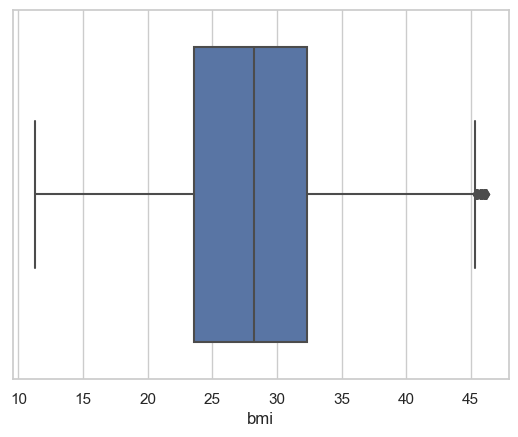

In [42]:
sns.set(style='whitegrid')
ax=sns.boxplot(df['bmi'],orient='h')

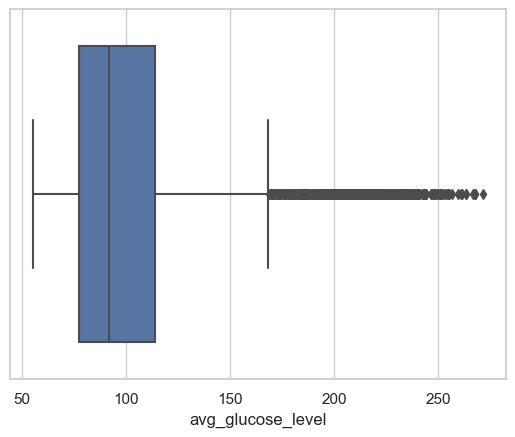

In [43]:
sns.set(style='whitegrid')
ax=sns.boxplot(df['avg_glucose_level'],orient='h')

In [44]:
Q1g=df['avg_glucose_level'].quantile(0.25)
Q3g=df['avg_glucose_level'].quantile(0.75)
IQRg=Q3g-Q1g
Infg = df['avg_glucose_level'].quantile(0.25)-1.5*IQRg
Supg = df['avg_glucose_level'].quantile(0.75)+1.5*IQRg
for i in df['avg_glucose_level']:
     if i >=Supg or i<=Infg :
            df['avg_glucose_level']=df['avg_glucose_level'].replace(i,np.mean(df['avg_glucose_level']))

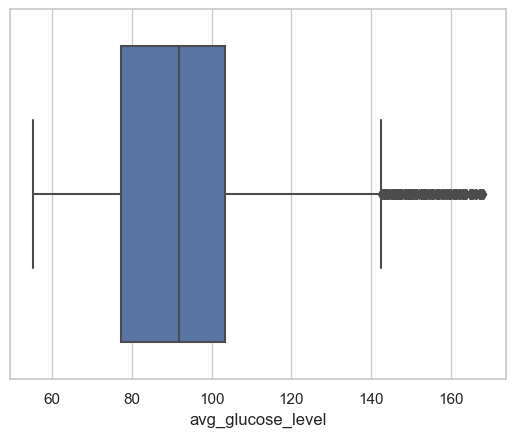

In [45]:
sns.set(style='whitegrid')
ax=sns.boxplot(x=df['avg_glucose_level'],orient='h') #, showfliers=False)

In [46]:
df.loc[df['avg_glucose_level']>=Supg].count()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [47]:
print(Supg)
print(Infg)

168.59124999999997
22.36125000000002


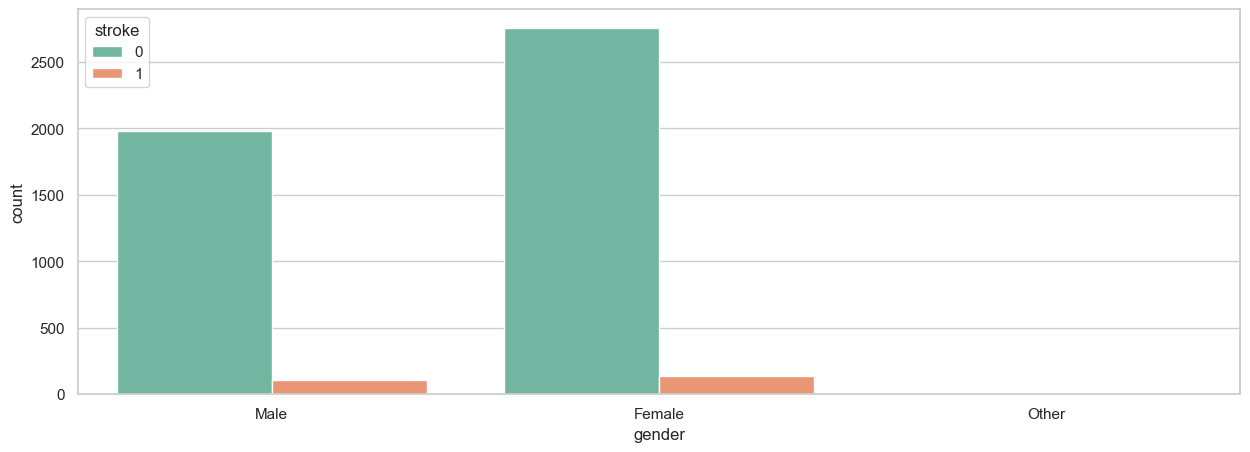

In [48]:
plt.figure(figsize=(15,5))

sns.countplot(data=df, x='gender',hue=df['stroke'], palette='Set2');

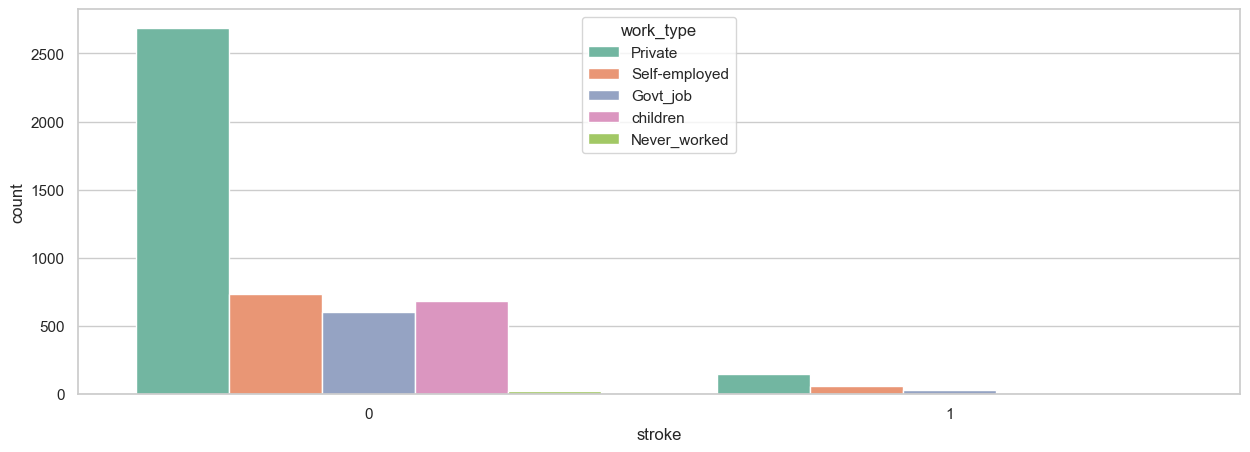

In [49]:
plt.figure(figsize=(15,5))

sns.countplot(x='stroke',hue=df['work_type'],palette='Set2',data=df);

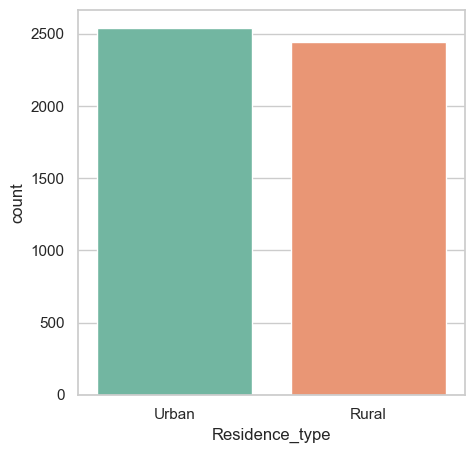

In [50]:
plt.figure(figsize=(5,5))
sns.countplot( x='Residence_type', palette='Set2', data=df);

<AxesSubplot:xlabel='ever_married', ylabel='count'>

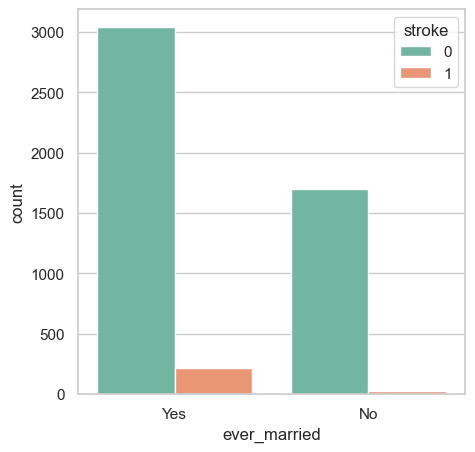

In [51]:
plt.figure(figsize=(5,5))
sns.countplot( x='ever_married', hue=df['stroke'], palette='Set2', data=df)

<AxesSubplot:xlabel='smoking_status', ylabel='count'>

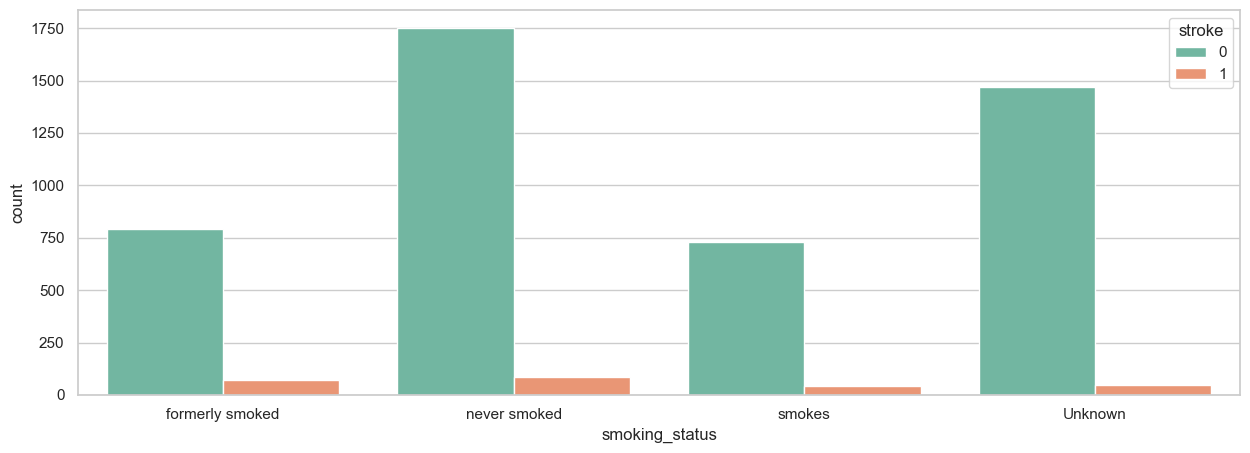

In [52]:
plt.figure(figsize=(15,5))
sns.countplot( x='smoking_status', hue=df['stroke'], palette='Set2', data=df)

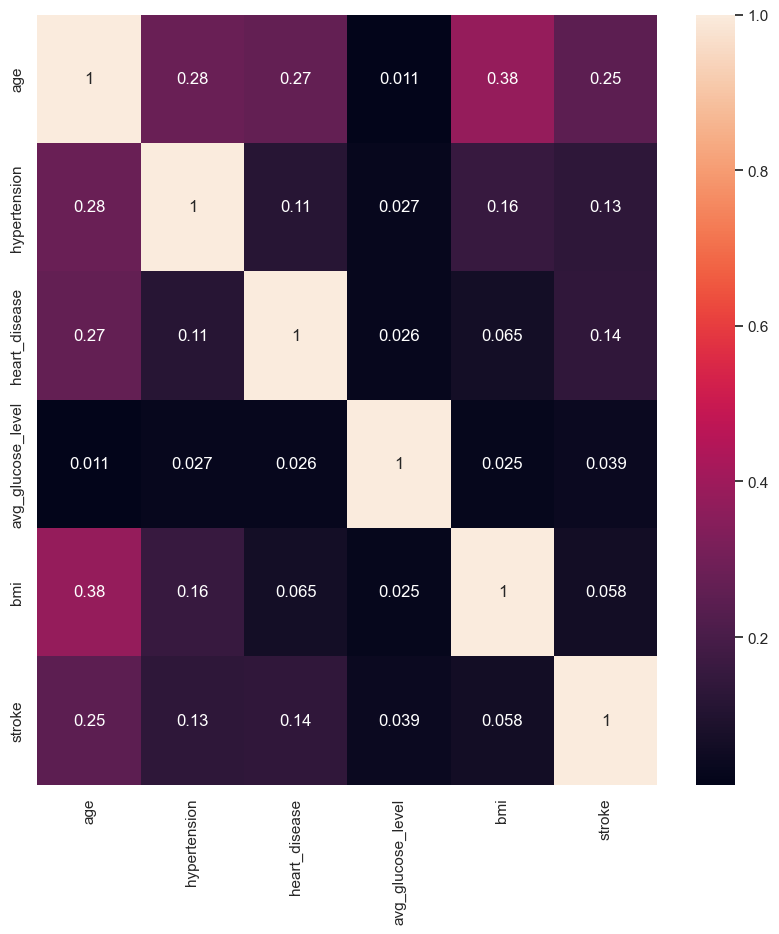

In [53]:
plt.figure(figsize=(10,10))
correlation = df.corr( method='pearson' )
sns.heatmap( correlation, annot=True );

In [54]:
df.shape

(4984, 11)

In [55]:
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67,0,1,Yes,Private,Urban,105.730688,36.600000,formerly smoked,1
1,Female,61,0,0,Yes,Self-employed,Rural,105.706017,28.893237,never smoked,1
2,Male,80,0,1,Yes,Private,Rural,105.920000,32.500000,never smoked,1
3,Female,49,0,0,Yes,Private,Urban,105.667292,34.400000,smokes,1
4,Female,79,1,0,Yes,Self-employed,Rural,105.654137,24.000000,never smoked,1


In [56]:
X = df.iloc[:,0:10]
Y= df.iloc[:,10]

In [57]:
X.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,Male,67,0,1,Yes,Private,Urban,105.730688,36.600000,formerly smoked
1,Female,61,0,0,Yes,Self-employed,Rural,105.706017,28.893237,never smoked
2,Male,80,0,1,Yes,Private,Rural,105.920000,32.500000,never smoked
3,Female,49,0,0,Yes,Private,Urban,105.667292,34.400000,smokes
4,Female,79,1,0,Yes,Self-employed,Rural,105.654137,24.000000,never smoked


In [58]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: stroke, dtype: int64

In [59]:
X=X.values
Y=Y.values

In [60]:
type(X)

numpy.ndarray

In [61]:
X[:5,:]

array([['Male', 67, 0, 1, 'Yes', 'Private', 'Urban', 105.7306882022472,
        36.6, 'formerly smoked'],
       ['Female', 61, 0, 0, 'Yes', 'Self-employed', 'Rural',
        105.706017393299, 28.893236911794666, 'never smoked'],
       ['Male', 80, 0, 1, 'Yes', 'Private', 'Rural', 105.92, 32.5,
        'never smoked'],
       ['Female', 49, 0, 0, 'Yes', 'Private', 'Urban',
        105.66729187860932, 34.4, 'smokes'],
       ['Female', 79, 1, 0, 'Yes', 'Self-employed', 'Rural',
        105.65413724214835, 24.0, 'never smoked']], dtype=object)

In [62]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [63]:
X[:,0] = label.fit_transform(X[:,0]) # colonne gender devient 1-->male ou 0-->female
X[:,4] = label.fit_transform(X[:,4]) # colonne ever_married devient no-->0 ou yes-->1
X[:,6] = label.fit_transform(X[:,6]) # colonne Residence_type devient rural-->0 ou urban-->1

In [64]:
X[:10,:]

array([[1, 67, 0, 1, 1, 'Private', 1, 105.7306882022472, 36.6,
        'formerly smoked'],
       [0, 61, 0, 0, 1, 'Self-employed', 0, 105.706017393299,
        28.893236911794666, 'never smoked'],
       [1, 80, 0, 1, 1, 'Private', 0, 105.92, 32.5, 'never smoked'],
       [0, 49, 0, 0, 1, 'Private', 1, 105.66729187860932, 34.4, 'smokes'],
       [0, 79, 1, 0, 1, 'Self-employed', 0, 105.65413724214835, 24.0,
        'never smoked'],
       [1, 81, 0, 0, 1, 'Private', 1, 105.64040011077641, 29.0,
        'formerly smoked'],
       [1, 74, 1, 1, 1, 'Private', 0, 70.09, 27.4, 'never smoked'],
       [0, 69, 0, 0, 0, 'Private', 1, 94.39, 22.8, 'never smoked'],
       [0, 59, 0, 0, 1, 'Private', 0, 76.15, 28.893236911794666,
        'Unknown'],
       [0, 78, 0, 0, 1, 'Private', 1, 58.57, 24.2, 'Unknown']],
      dtype=object)

In [65]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [66]:
ct = ColumnTransformer([('work_type',OneHotEncoder(),[5])],\
                       remainder = 'passthrough')

In [67]:
X = ct.fit_transform(X)

In [68]:
X.shape # ajout de 4 autres colonnes 
#private ---> 0.0 0.0 1.0 0.0 0.0 

(4984, 14)

In [69]:
X[:,0:5]

array([[0.0, 0.0, 1.0, 0.0, 0.0],
       [0.0, 0.0, 0.0, 1.0, 0.0],
       [0.0, 0.0, 1.0, 0.0, 0.0],
       ...,
       [0.0, 0.0, 0.0, 1.0, 0.0],
       [0.0, 0.0, 1.0, 0.0, 0.0],
       [1.0, 0.0, 0.0, 0.0, 0.0]], dtype=object)

In [70]:
X = X[:,1:]

In [71]:
X.shape

(4984, 13)

In [72]:
X[:5,:]

array([[0.0, 1.0, 0.0, 0.0, 1, 67, 0, 1, 1, 1, 105.7306882022472, 36.6,
        'formerly smoked'],
       [0.0, 0.0, 1.0, 0.0, 0, 61, 0, 0, 1, 0, 105.706017393299,
        28.893236911794666, 'never smoked'],
       [0.0, 1.0, 0.0, 0.0, 1, 80, 0, 1, 1, 0, 105.92, 32.5,
        'never smoked'],
       [0.0, 1.0, 0.0, 0.0, 0, 49, 0, 0, 1, 1, 105.66729187860932, 34.4,
        'smokes'],
       [0.0, 0.0, 1.0, 0.0, 0, 79, 1, 0, 1, 0, 105.65413724214835, 24.0,
        'never smoked']], dtype=object)

In [73]:
ct = ColumnTransformer([('smoking_status',OneHotEncoder(),[12])],\
                      remainder = 'passthrough')

In [74]:
X = ct.fit_transform(X)

In [75]:
X[:5,:] # smoking_status est remplacé par 4 colonnes au début

array([[0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1, 67, 0, 1, 1, 1,
        105.7306882022472, 36.6],
       [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0, 61, 0, 0, 1, 0,
        105.706017393299, 28.893236911794666],
       [0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1, 80, 0, 1, 1, 0,
        105.92, 32.5],
       [0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0, 49, 0, 0, 1, 1,
        105.66729187860932, 34.4],
       [0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0, 79, 1, 0, 1, 0,
        105.65413724214835, 24.0]], dtype=object)

In [76]:
X = X[:,1:]

In [77]:
X.shape


(4984, 15)

In [78]:
X[:5,:]

array([[1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1, 67, 0, 1, 1, 1,
        105.7306882022472, 36.6],
       [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0, 61, 0, 0, 1, 0,
        105.706017393299, 28.893236911794666],
       [0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1, 80, 0, 1, 1, 0, 105.92,
        32.5],
       [0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0, 49, 0, 0, 1, 1,
        105.66729187860932, 34.4],
       [0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0, 79, 1, 0, 1, 0,
        105.65413724214835, 24.0]], dtype=object)

In [79]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.2,\
                                                random_state=0)
# random_state  D'un autre côté, si vous utilisez random_state=some_number, 
#vous pouvez garantir que la sortie de Run 1 sera égale à la sortie de Run 2, 
#c'est-à-dire que votre division sera toujours la même. Peu importe le nombre réel de random_state 42, 0, 21, ... 
# L'important est qu'à chaque fois que vous utilisez 42, vous obtiendrez toujours la même sortie la première fois que 
#vous effectuez le fractionnement.

In [80]:
X_train.shape

(3987, 15)

In [81]:
X_test.shape

(997, 15)

In [82]:
Y.mean()

0.049357945425361156

In [83]:
print(y_train.mean())
print(y_test.mean())

0.04890895410082769
0.05115346038114343


In [84]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [85]:
X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)

In [86]:
X_train_sc[0:5,:]

array([[-0.45987593, -0.76339435,  2.35061019, -0.06543788, -1.15453161,
        -0.43402253, -0.39876262,  1.17425648, -0.48865318, -0.3217376 ,
        -0.24340395,  0.73078831, -1.02463236, -0.4345941 , -0.37874265],
       [ 2.17449955, -0.76339435, -0.42542145, -0.06543788,  0.86615212,
        -0.43402253, -0.39876262,  1.17425648,  0.87161861,  3.10812288,
        -0.24340395,  0.73078831,  0.97595981,  0.04686664,  0.52470066],
       [-0.45987593, -0.76339435, -0.42542145, -0.06543788, -1.15453161,
        -0.43402253,  2.50775762,  1.17425648, -1.45400735, -0.3217376 ,
        -0.24340395, -1.36838532,  0.97595981,  0.49137185, -1.38758767],
       [-0.45987593,  1.30993895, -0.42542145, -0.06543788,  0.86615212,
        -0.43402253, -0.39876262,  1.17425648,  0.60834019, -0.3217376 ,
        -0.24340395,  0.73078831,  0.97595981,  0.8676035 , -0.06253749],
       [-0.45987593,  1.30993895, -0.42542145, -0.06543788, -1.15453161,
         2.30402784, -0.39876262, -0.85160271, 

In [110]:
from sklearn.svm import SVC
linear_SVM = SVC(kernel='linear')
linear_SVM.fit(X_train_sc,y_train)

SVC(kernel='linear')

In [111]:
y_predictSVM_l = linear_SVM.predict(X_test_sc)

In [112]:
svm_acc=accuracy_score(y_test,y_predictSVM_l)
svm_prec=precision_score(y_test,y_predictSVM_l)
svm_rec=recall_score(y_test,y_predictSVM_l)

print(confusion_matrix(y_test,y_predictSVM_l))
print('Accuracy linear SVM {0:.3f}'.format(svm_acc))
print('Precision linear SVM {0:.3f}'.format(svm_prec))
print('Recall linear SVM {0:.3f}'.format(svm_rec))

[[946   0]
 [ 51   0]]
Accuracy linear SVM 0.949
Precision linear SVM 0.000
Recall linear SVM 0.000


In [113]:
print(classification_report(y_test,y_predictSVM_l))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       946
           1       0.00      0.00      0.00        51

    accuracy                           0.95       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.90      0.95      0.92       997



In [115]:
kernel_SVM = SVC(kernel='rbf')
kernel_SVM.fit(X_train_sc,y_train)
y_predictSVM_k = kernel_SVM.predict(X_test_sc)

Ksvm_acc=accuracy_score(y_test,y_predictSVM_k)
Ksvm_rec=precision_score(y_test,y_predictSVM_k)
Ksvm_prec=recall_score(y_test,y_predictSVM_k)
print(confusion_matrix(y_test,y_predictSVM_k))
print('Accuracy rbf SVM {0:.3f}'.format(Ksvm_acc))
print('Precision rbf SVM {0:.3f}'.format(Ksvm_rec))
print('Recall rbf SVM {0:.3f}'.format(Ksvm_prec))

[[946   0]
 [ 51   0]]
Accuracy rbf SVM 0.949
Precision rbf SVM 0.000
Recall rbf SVM 0.000


In [116]:
print(classification_report(y_test,y_predictSVM_k))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       946
           1       0.00      0.00      0.00        51

    accuracy                           0.95       997
   macro avg       0.47      0.50      0.49       997
weighted avg       0.90      0.95      0.92       997



In [118]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train_sc,y_train)

LogisticRegression()

In [119]:
y_predictLR = LR.predict(X_test_sc)

LR_acc=accuracy_score(y_test,y_predictLR)
LR_prec=metrics.precision_score(y_test,y_predictLR)
LR_rec=metrics.recall_score(y_test,y_predictLR)
print(confusion_matrix(y_test,y_predictLR))
print('Accuracy Logistic Regression {0:.3f}'.format(LR_acc))
print('Precision Logistic Regression {0:.3f}'.format(LR_prec))
print('Recall Logistic Regression {0:.3f}'.format(LR_rec))


[[946   0]
 [ 51   0]]
Accuracy Logistic Regression 0.949
Precision Logistic Regression 0.000
Recall Logistic Regression 0.000


In [120]:
print("| Algorithm       | Accuracy     |Recall     | Precision  |")
print("| --------------- | -------------|-----------|------------|")
print("| Optimized kNN   | {0:.3f}        | {0:.3f}     | {0:.3f}      |".format(knn_op_acc,knn_op_rec,knn_op_prec))
print("| Decision Tree   | {0:.3f}        | {0:.3f}     | {0:.3f}      |".format(dt_acc,dt_rec,dt_prec))
print("| Random Forest   | {0:.3f}        | {0:.3f}     | {0:.3f}      |".format(rf_acc,rf_rec,rf_prec))
print("| Linear SVM      | {0:.3f}        | {0:.3f}     | {0:.3f}      |".format(svm_acc,svm_rec,svm_prec))
print("| Kernel SVM      | {0:.3f}        | {0:.3f}     | {0:.3f}      |".format(Ksvm_acc,Ksvm_rec,Ksvm_prec))
print("| Logistic Reg    | {0:.3f}        | {0:.3f}     | {0:.3f}      |".format(LR_acc,LR_rec,LR_prec))

| Algorithm       | Accuracy     |Recall     | Precision  |
| --------------- | -------------|-----------|------------|
| Optimized kNN   | 0.949        | 0.949     | 0.949      |
| Decision Tree   | 0.928        | 0.928     | 0.928      |
| Random Forest   | 0.958        | 0.958     | 0.958      |
| Linear SVM      | 0.949        | 0.949     | 0.949      |
| Kernel SVM      | 0.949        | 0.949     | 0.949      |
| Logistic Reg    | 0.949        | 0.949     | 0.949      |


In [1]:
import streamlit as st
import pandas as pd


In [2]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv')


In [3]:
st.title('Application de gestion de données')

# Afficher les données
st.dataframe(data)


2023-05-16 11:05:30.680 
  command:

    streamlit run C:\Users\hp\anaconda3\lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [12]:
# Sélecteur de colonnes
selected_columns = st.multiselect('Sélectionner les colonnes', data.columns)

# Filtrer les données
filtered_data = data[selected_columns]

# Afficher les données filtrées
st.dataframe(filtered_data)


DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)

In [11]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.
